In [4]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("C:/Users/Dell/Downloads/youtube.csv")

In [6]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [8]:
data.shape
print("Number of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 5000
Number of columns 6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [12]:
pd.options.display.float_format='{:.2f}'.format
data.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [14]:
import numpy as np
data=data.replace('--',np.nan,regex=True)
data.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [16]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [18]:
per_missing=data.isnull().sum()*100/len(data)


In [20]:
per_missing

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

<Axes: >

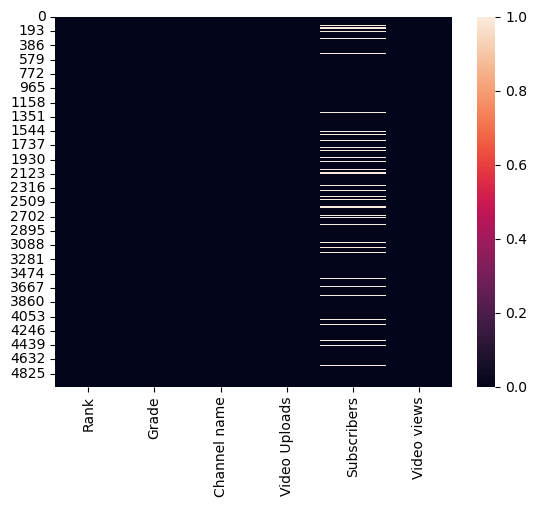

In [22]:
sns.heatmap(data.isnull())

<Axes: >

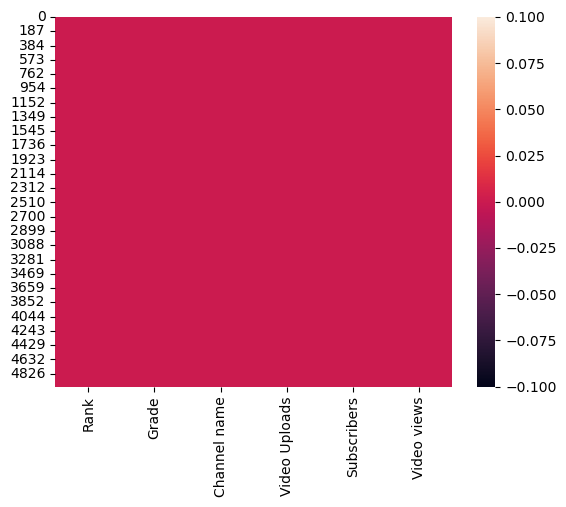

In [23]:
data.dropna(axis=0,inplace=True)
sns.heatmap(data.isnull())

In [25]:
#Data cleaning (Rank column)Strings and commas
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [27]:
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [30]:
data['Rank']=data['Rank'].str[0:-2]
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


In [32]:
data['Rank']=data['Rank'].str.replace(' , ' ,' ')
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998",B+,Mastersaint,110,3265735,311758426
4998,"4,999",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000",B+,SehatAQUA,254,21172,73312511


In [34]:
#data['Rank']=data['Rank'].astype(int)
non_numeric_rows = data[~data['Rank'].str.replace(' ', '').str.isnumeric()]
print(non_numeric_rows)

       Rank Grade                      Channel name Video Uploads Subscribers  \
999   1,000    A   Jugnu Kids - Nursery Rhymes and…           282     2883696   
1000  1,001    A                 IDEAS EN 5 MINUTOS          1089     4429603   
1001  1,002    A                       Tin Siêu Còi           534      695068   
1002  1,003    A                            BIGBANG           769     9998464   
1003  1,004    A                    Wow Kidz Comedy           871     1511557   
...     ...   ...                               ...           ...         ...   
4995  4,996   B+                     Uras Benlioğlu           706     2072942   
4996  4,997   B+                  HI-TECH MUSIC LTD           797     1055091   
4997  4,998   B+                        Mastersaint           110     3265735   
4998  4,999   B+                     Bruce McIntosh          3475       32990   
4999  5,000   B+                          SehatAQUA           254       21172   

      Video views  
999    

In [36]:
data['Rank'] = data['Rank'].astype(str).str.replace(' ', '')  # Remove spaces
data['Rank'] = pd.to_numeric(data['Rank'], errors='coerce')  # Convert to numbers, set non-numeric to NaN
data['Rank'] = data['Rank'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

In [38]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [40]:
data['Video Uploads']=data['Video Uploads'].astype(int)
data['Subscribers']=data['Subscribers'].astype(int)

In [42]:
data.dtypes

Rank              int32
Grade            object
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [44]:
#data cleaning(grade column)
data.head()


,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757,18752951,20869786591
1,2,A++,T-Series,12661,61196302,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,A++,SET India,27323,31180559,22675948293
4,5,A++,WWE,36756,32852346,26273668433


In [46]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [48]:
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [50]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5,SET India,27323,31180559,22675948293
4,5,5,WWE,36756,32852346,26273668433


In [52]:
data.dtypes

Rank              int32
Grade             int64
Channel name     object
Video Uploads     int32
Subscribers       int32
Video views       int64
dtype: object

In [57]:
#find average views for each channel
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [61]:
data['Avg_views']=data['Video views']/data['Video Uploads']
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
0,1,5,Zee TV,82757,18752951,20869786591,252181.53
1,2,5,T-Series,12661,61196302,47548839843,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,26255509.60
3,4,5,SET India,27323,31180559,22675948293,829921.62
4,5,5,WWE,36756,32852346,26273668433,714813.05


In [67]:
data.sort_values(by ='Video Uploads',ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Avg_views
3453,0,1,AP Archive,422326,746325,548619569,1299.04
1149,0,2,YTN NEWS,355996,820108,1640347646,4607.77
2223,0,1,SBS Drama,335521,1418619,1565758044,4666.65
323,324,3,GMA News,269065,2599175,2786949164,10357.90
2956,0,1,MLB,267649,1434206,1329206392,4966.23


<Axes: xlabel='Grade', ylabel='Video Uploads'>

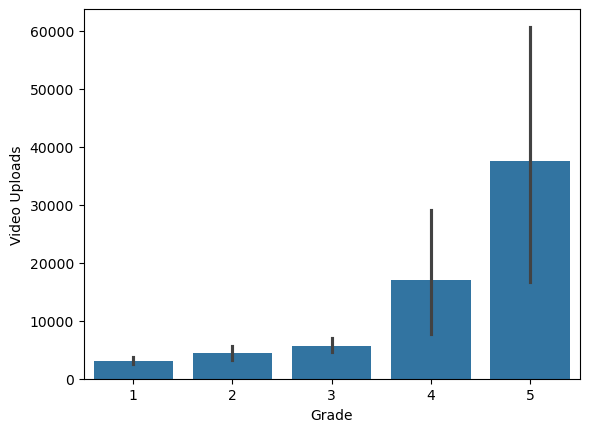

In [82]:
#which grade has highest number of video uploads
sns.barplot(x='Grade',y='Video Uploads',data=data)

<Axes: xlabel='Grade', ylabel='Avg_views'>

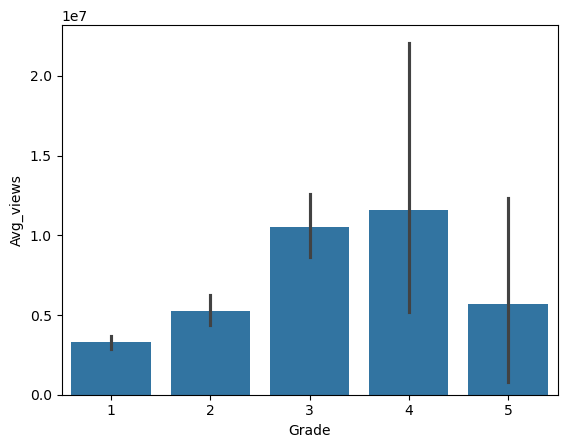

In [84]:
#which grade has highest average views
sns.barplot(x='Grade',y='Avg_views',data=data)

<Axes: xlabel='Grade', ylabel='Subscribers'>

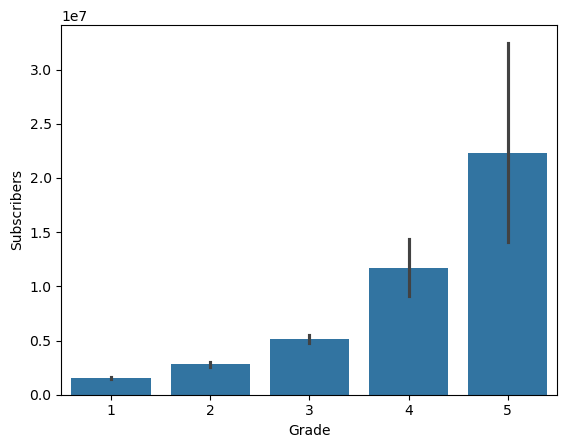

In [86]:
#which grade has highest no of subscribers
sns.barplot(x='Grade',y='Subscribers',data=data)

In [94]:
# Convert 'Grade' to string
data['Grade'] = data['Grade'].astype(str)

# Check for any non-numeric columns that might be interfering
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Exclude non-numeric columns except 'Grade'
numeric_data = data.drop(columns=non_numeric_cols.difference(['Grade']))

# Group by 'Grade' and calculate mean
mean_values = numeric_data.groupby('Grade').mean()


Non-numeric columns: Index(['Grade', 'Channel name'], dtype='object')


In [96]:
mean_values

,Rank,Video Uploads,Subscribers,Video views,Avg_views
Grade,,,,,
1,0.00,3136.16,1535207.95,555183839.09,3280380.88
2,0.00,4382.58,2798520.38,1102450027.69,5254804.04
3,518.57,5709.86,5107136.29,2497972949.11,10540908.45
4,31.32,16960.30,11726947.47,6168741772.73,11577080.32
5,5.50,37450.70,22281762.50,21199091192.80,5688267.96
